# Introduction

The EDA aims to explore the model's performance and accuracy in specific scenarios and to determine a preliminar grade of fidelity in its estimation.

# Import Libraries

In [1]:
# Importing libraries
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer , LabelEncoder

# Data Cleaning and Treating [I]

The dataset was loaded and its string features were converted to categorical data type and encoded to numerical values. It was not necessary to drop null values or deal with missing values. 

In [2]:
# Loading [raw] dataset
ObesityDataset_Raw = pd.read_csv('ObesityDataset_Raw.csv')

In [3]:
# Getting categorical and numerical features
CategoricalFeatures = []
NumbericalFeatures = []

for label in ObesityDataset_Raw.columns:
    if ObesityDataset_Raw[label].dtype == 'object':
        CategoricalFeatures.append(label)
    else:
        NumbericalFeatures.append(label)

In [4]:
# Capitalizing values of categorical features
def CapitalizeIfNecessary(value):
    if value == 'no' or value == 'yes':
        return value.capitalize()
    else:
        return value

ObesityDataset_Raw[CategoricalFeatures] = ObesityDataset_Raw[CategoricalFeatures].map(CapitalizeIfNecessary)

In [5]:
# Transforming categorical features' data type into categorical data type
ObesityDataset_Raw[CategoricalFeatures] = ObesityDataset_Raw[CategoricalFeatures].astype('category')

In [28]:
# Encoding categorical features into numerical features

## Feature NObeyesdad
OrderedCategories_NObeyesdad = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
Encoder_NObeyesdad = {category:value for value , category in enumerate(OrderedCategories_NObeyesdad)}
ObesityDataset_Raw['NObeyesdad_Encode'] = ObesityDataset_Raw['NObeyesdad'].map(Encoder_NObeyesdad).astype(int)

## Feature Gender
Values_Gender = ['Female', 'Male']
Encoder_Gender = {category:value for value , category in enumerate(Values_Gender)}
ObesityDataset_Raw['Gender_Encode'] = ObesityDataset_Raw['Gender'].map(Encoder_Gender).astype(int)

## Other features
Values_Binary = ['Yes','No']
__Encoder_Binary = LabelBinarizer().fit(Values_Binary)
Encoder_Binary = lambda value: __Encoder_Binary.transform([value])[0,0]

for feature in CategoricalFeatures:
    if feature != 'Gender' and feature != 'NObeyesdad':
        if len(ObesityDataset_Raw[feature].unique()) > 2:
            ObesityDataset_Raw[feature+'_Encode'] = pd.DataFrame(LabelEncoder().fit_transform(ObesityDataset_Raw[feature])).astype(int)
        else:
            ObesityDataset_Raw[feature+'_Encode'] = ObesityDataset_Raw[feature].map(Encoder_Binary).astype(int)

In [7]:
# Getting encoded categorical features
CategoricalFeatures_Encode = [feature+'_Encode' for feature in CategoricalFeatures]

# Data Visualization and Analysis

Wether the dataset is grouped by obesity level and gender, can be seen that the number of samples in some subgroups is almost nil compared to others. For example, in obesity type II and obesity type III is observed this situation.

Therefore obesity type II, female and obesity type III, male are clases with low representation, so (preliminarily) the final model will not be able to learn enough to classify samples with this features and classes. But in the others will not apparently show this type of difficult.

In [ ]:
# Grouping by Obesity level and Gender
ObesityDataset_Raw.groupby(by=['NObeyesdad','Gender'],observed=True)['Age'].describe()[['count']]

count
NObeyesdad          Gender       
Insufficient_Weight Female  173.0
                    Male     99.0
Normal_Weight       Female  141.0
                    Male    146.0
Obesity_Type_I      Female  156.0
                    Male    195.0
Obesity_Type_II     Female    2.0
                    Male    295.0
Obesity_Type_III    Female  323.0
                    Male      1.0
Overweight_Level_I  Female  145.0
                    Male    145.0
Overweight_Level_II Female  103.0
                    Male    187.0

<Axes: >

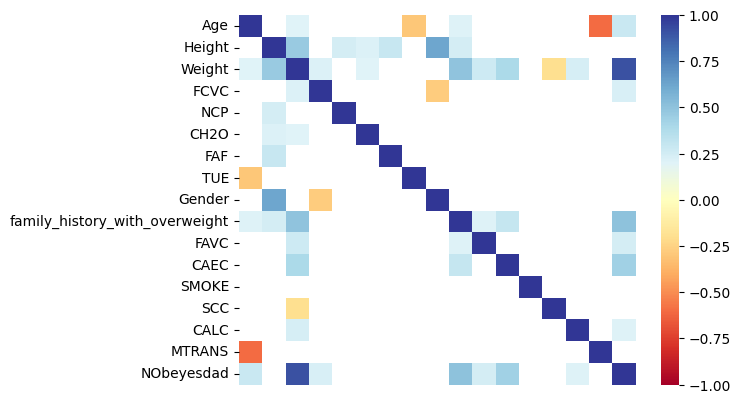

In [140]:
# Plotting correlation between features 
CorrelationMatrix = ObesityDataset_Raw[NumbericalFeatures+CategoricalFeatures_Encode].corr()
MaskValues = CorrelationMatrix.apply(lambda value: abs(value)<=0.2)
TickLabels_Y = NumbericalFeatures+CategoricalFeatures
sns.heatmap(CorrelationMatrix,mask=MaskValues,cmap='RdYlBu',yticklabels=TickLabels_Y,xticklabels=False,vmax=1,vmin=-1)

In [30]:
# Grouping by Obesity level
GroupObesityLevel = ObesityDataset_Raw.groupby(by=['NObeyesdad'],observed=True)

# Subgrouping by Obesity level categories
SubgroupsObesityLevel = dict()
for subgroup in ObesityDataset_Raw['NObeyesdad'].unique():
    SubgroupsObesityLevel[subgroup] = GroupObesityLevel.get_group((subgroup,))

## Insufficient and Normal Weight
ObesityGroup_1 = ['Insufficient_Weight','Normal_Weight']
ObseityLevel_Group_1 = pd.concat([SubgroupsObesityLevel[subgroup] for subgroup in ObesityGroup_1])

## Overweight 
ObesityGroup_2 = ['Overweight_Level_I','Overweight_Level_II']
ObseityLevel_Group_2 = pd.concat([SubgroupsObesityLevel[subgroup] for subgroup in ObesityGroup_2])

## Obesity
ObesityGroup_3 = ['Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']
ObseityLevel_Group_3 = pd.concat([SubgroupsObesityLevel[subgroup] for subgroup in ObesityGroup_3])

Because of the physical condition (insufficient weight, normal weight, overweight and obesity) is strongly related to the height, weight, gender and age of someone, hence these features become relevant for the model.

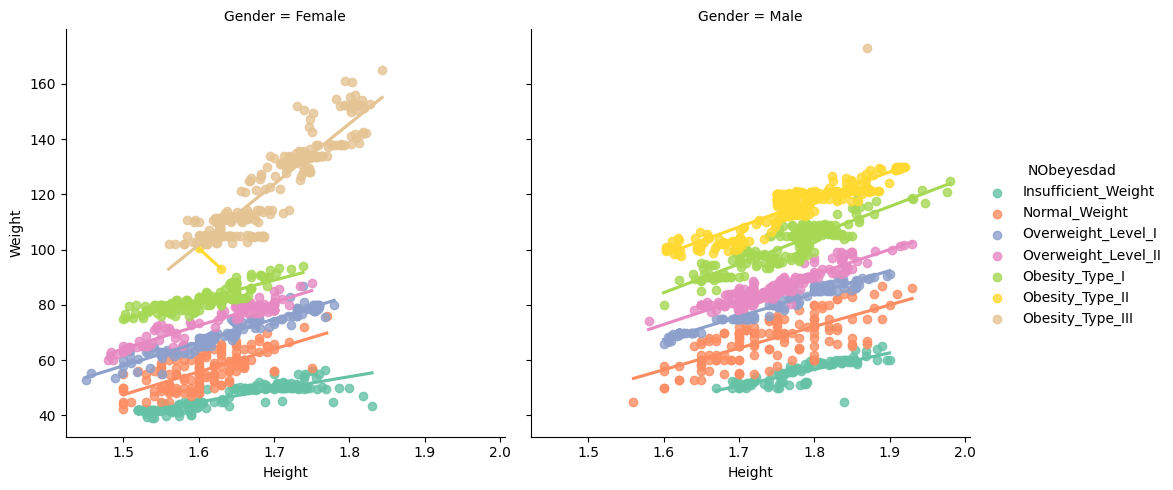

In [236]:
ObesityLevelOrder = ['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']

sns.lmplot(data=ObesityDataset_Raw,x='Height',y='Weight',hue='NObeyesdad',col='Gender',hue_order=ObesityLevelOrder,palette='Set2',ci=None)

The before plot shows this strong relation and also show that there are not enough data points (samples) in some categories of obesity level - gender. Therefore in some scenarios the model will have a poor estimation quality.